# Descripcion
Papemill es un paquete de python que permito reproducir de manera automática jupyer notebooks.  Solo se necesita especificar una serie de parametros.  Se crea un jupyter notebook "plantilla", el cual se corre una vez, y luego desde la terminal, un código python, u otro jupyter notebook se corre la herramienta, y se genera un nuevo fichero jupyter notebook por parámetro sobre el cual hayamos querido iterar.  Aquí usaremos la opción del jupyter notebook, e iteraremos sobre el año en que tenemos datos de satélite de temperatura (como en los tutoriales anterirores).

Pueden leer más sobre esta herramienta aquí:
* https://papermill.readthedocs.io/en/latest/ 
* https://papermill.readthedocs.io/en/latest/usage-execute.html 
* https://medium.com/y-data-stories/automating-jupyter-notebooks-with-papermill-4b8543ece92f 

# Parametros:

Para que el código sepa cual es la celda de ljupyter notebook que contiene los parámetros, hay que etiquetar (tag) esa celda con el nombre de parameters.  Dependiendo de la interfaz que usemos, los pasos a seguir son:
* Jupyter hub (interfaz en la que solo sale el notebook):
    1. Ir a _View_ → _Cell Toolbar_ → _Tags_
    2. Ahora en la parte de arriba a la derecha de las celdas debería aparecer una cajita.
    3. Seleccionar la celda del notebook que vaya a contener los parámetros
    4. Escribir ahí: _parameters_
    5. Ahora debería aparecer `parameters` en otra cajita en el lado izquierdo de la celda.
    
    <br>
    
* Jupyter lab:
    1. Ir a _View_ → _Property inspector_
    2. Aparacerá una barra de comandos en el lado derecho
    3. Seleccionar la celda del notebook que vaya a contener los parámetros
    4. Bajo _Common tools_ en _Cell tags_, si ya existe la etiqueta _parameters_, clicar en ella, sino crear la etiqueta escribiendo _parameters_ en _Add tag_
    5. Ahora, bajo _Cell tags_, debería aparecer la etiqueta _parameters_ con un &#10004; as su izquierda
    

In [1]:
fecha = '1965-09-01'
nombre_salida = "TEMPLATE"


In [2]:
# Parameters
fecha = "1959-01-01"
nombre_salida = "output_1959-01-01"


In [3]:
print('fecha: ', fecha)

fecha:  1959-01-01


In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import glob
from collections import Counter
from netCDF4 import Dataset

import cmocean as cmo



In [5]:
# fichero = '../../../shared-readwrite/ERA5/ERA5_Coarse.nc' ## 
fichero = '../../../shared/datos_para_tutoriales/Talleres_intermedios/7-Octubre-2025/informes_python/ERA5_Coarse.nc'


In [6]:
fileobj = xr.open_dataset(fichero) # importando el archivo
sst = fileobj['sst'][:] # Leyendo las variables del archivo, como dijimos, un nombre auto-explicativo
sst = sst - 273.15 # convertiendo a Celsius de Kelvin

## Seleccionamos los datos de la fecha especificada:

In [7]:
sst_sel = sst.sel(time=fecha); # El ";" es para que no se muestren los outputs de esta función


## Graficamos los valores de temperatura para ese día:

In [8]:
cmap = cmo.cm.thermal


Graficamos usando la función de matplotlib `imshow`, la cual usa indices de pixel. Esto quiere decir que se basa en los índices de los datos para graficar, no en las coordenadas, porej. lon y lat. ¡Así que cuidado, a veces pueden salir las gráficas al revés dependiendo de los índices! Para más información: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html 

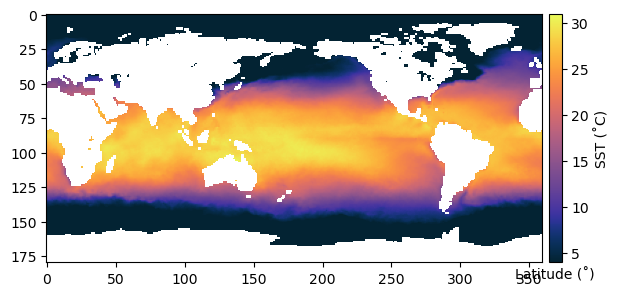

In [9]:
fig, ax = plt.subplots()
image = plt.imshow(sst_sel,cmap=cmap,
                  vmin=4,vmax=31)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)

plt.xlabel('Longitude (˚)')
plt.xlabel('Latitude (˚)')
cbar.set_label('SST (˚C)') 
plt.show()

## Calculamos y visualizamos ahora la anomalía de SST para el día:

### Para ello primero quitamos la media de todos los años:

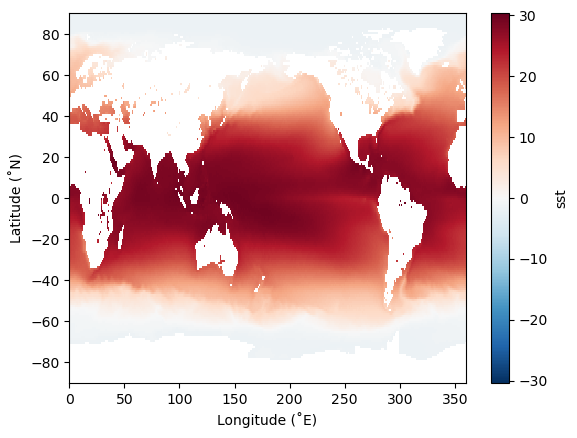

In [10]:
fig, ax = plt.subplots()
sst.mean(dim='time').plot()

plt.xlabel('Longitude (˚E)')
plt.ylabel('Latitude (˚N)')
plt.show()


In [11]:
print('La anomalía de SST en el día ' + fecha + ' fue:')

La anomalía de SST en el día 1959-01-01 fue:


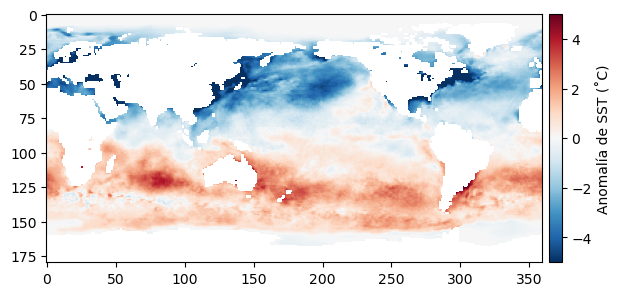

In [12]:
fig, ax = plt.subplots()
image = plt.imshow(sst_sel - sst.mean(dim='time'), cmap='RdBu_r'
                  , vmin=-5, vmax=5)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])

cbar= plt.colorbar(image, cax=cax)
cbar.set_label('Anomalía de SST (˚C)') 
plt.show()

In [13]:
import subprocess

# Construimos el comando nbconvert usando el parámetro: nombre_entrada
command = f'jupyter nbconvert --to html --no-input {nombre_salida}.ipynb --output {nombre_salida}.html'

# Ejecutamos el comando
subprocess.run(command, shell=True, check=True)

# Cualquier fichero exisitente previamente se sobreescribirá con el nuevo generado aquí.

[NbConvertApp] Converting notebook output_1959-01-01.ipynb to html


[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 624620 bytes to output_1959-01-01.html


CompletedProcess(args='jupyter nbconvert --to html --no-input output_1959-01-01.ipynb --output output_1959-01-01.html', returncode=0)